<a href="https://colab.research.google.com/github/Cr7stian8/Cr7stian8/blob/main/testesIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# O potencial para cada região vai ser criado abaixo
from IPython.display import display, Math
from scipy.special import iv as I_m
from scipy.special import kv as K_m
import numpy as np
from sympy import symbols, pi, Rational, cos, Sum, besseli, besselk

# Definindo as equações em LaTeX
print('Os potenciais vão ser dados por: \n')

psi_I = r"""
\begin{aligned}
    \psi_I &= \sum_{r=0, r'=1}^1 \sum_{m=0}^\infty \sum_{n=1}^\infty
    \cos\left(nc\left(z + \frac{r\pi}{2}\right)\right)
    \cos\left(m\left(\phi + \frac{r'\pi}{2}\right)\right)
    I_m(nc\rho)+ \sum_{r=0}^1 \sum_{m=1}^\infty
    \cos\left(m\left(\phi + \frac{r\pi}{2}\right)\right)
    \rho^m
\end{aligned}
"""

psi_II = r"""
\psi_{II} = \sum_{r,r'=0}^1 \sum_{n,m=0}^\infty \cos \left( m \left( \phi + \frac{r'\pi}{2} \right) \right) \cos \left( n \frac{2\pi}{L} \left( z + \frac{r\pi}{2} \right) \right) \left[ I_m(ncp) + K_m(ncp) \right]
"""

psi_III = r"""
\psi_{III} = \sum_{r,r'=0}^1 \sum_{m=0}^\infty \sum_{n=0}^\infty \cos \left( m \left( \phi + \frac{r'\pi}{2} \right) \right) \cos \left( nc \left( z + \frac{r\pi}{2} \right) \right) K_m(ncp)
"""

# Exibindo as equações renderizadas
display(Math(psi_I))
display(Math(psi_II))
display(Math(psi_III))


# Definindo os parâmetros
L = 2e-9             # -> Distância em que a configuração das cargas se repetem
c = (2 * np.pi) / L

#Coordenadas rho
b = 2e-9             # -> Raio interno psi_I
d = 3e-9             # -> Raio externo psi_II

#Outras coordenadas que estão zeradas por enquanto
phi = 0
z = 0

#Exibindo os parâmetros
print('\n Os parâmetros que estão sendo utilizados são: \n')
print(f'L = {L} \n')
print(f'c = 2*π/ L \n')
print(f'b = {b} \n')
print(f'd = {d} \n')
print(f'phi = {phi} \n')

# Valores aproximados de kT a 298K aproximadamente 25C ->  kT = 4,11 × 10 −21

Os potenciais vão ser dados por: 



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


 Os parâmetros que estão sendo utilizados são: 

L = 2e-09 

c = 2*π/ L 

b = 2e-09 

d = 3e-09 

phi = 0 



<IPython.core.display.Math object>



Os parâmetros que estão sendo utilizados são: 

L = 2e-09
c = 2*π/ L
b = 2e-09
phi = 0

 O gráfico do potencial na região 1 está plotando os dois termos: 



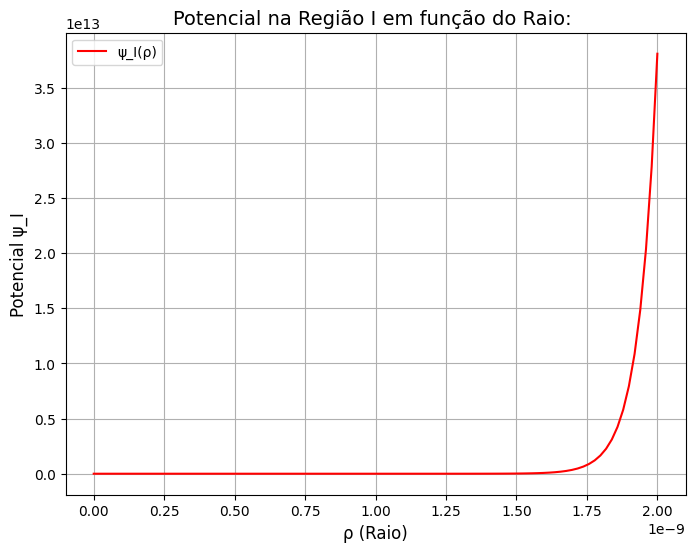

In [14]:
from IPython.display import display, Math
from scipy.special import iv as I_m
import numpy as np
import matplotlib.pyplot as plt

# Definindo Psi que será exibido
psi_I = r"""
\begin{aligned}
    \psi_I &= \sum_{r=0, r'=1}^1 \sum_{m=0}^\infty \sum_{n=1}^\infty
    \cos\left(nc\left(z + \frac{r\pi}{2}\right)\right)
    \cos\left(m\left(\phi + \frac{r'\pi}{2}\right)\right)
    I_m(nc\rho)+ \sum_{r=0}^1 \sum_{m=1}^\infty
    \cos\left(m\left(\phi + \frac{r\pi}{2}\right)\right)
    \rho^m
\end{aligned}
"""

# Exibindo Psi
print('\n')
display(Math(psi_I))
print('\n')

# Definindo os parâmetros
L = 2e-9
c = (2 * np.pi) / L
b = 2e-9
phi = 0
z = 0

#Exibindo os parâmetros
print('Os parâmetros que estão sendo utilizados são: \n')
print(f'L = {L}')
print(f'c = 2*π/ L')
print(f'b = {b}')
print(f'phi = {phi}')

# Função modificada para calcular ψ_I em função de rho
def calcular_psi_I(rho, m_max=5, n_max=5):
    soma = 0.0
    for r in [0, 1]:
        for r_linha in [0, 1]:
            for m in range(m_max + 1):
                for n in range(1, n_max + 1):
                    # Cálculo primeiro termo
                    cos_z = np.cos(n * c * (z + r * np.pi / 2))
                    cos_phi = np.cos(m * (phi + r_linha * np.pi / 2))
                    bessel = I_m(m, n * c * rho)
                    termo1 = cos_z * cos_phi * bessel
                    soma += termo1
    for r in [0, 1]:
          for m in range(1, m_max + 1):
              # Cálculo segundo termo
              cos_phi = np.cos(m * (phi + r * np.pi / 2))
              exp = rho**m
              termo2 = cos_phi * exp
              soma += termo2
    return soma

# Gerar valores de rho e calcular os potenciais
rho_valores = np.linspace(0, b, 100)
psi_valores = [calcular_psi_I(rho) for rho in rho_valores]

# Plotar o gráfico
print('\n O gráfico do potencial na região 1 está plotando os dois termos: \n')

plt.figure(figsize=(8, 6))
plt.plot(rho_valores, psi_valores, label='ψ_I(ρ)', color='red')
plt.xlabel('ρ (Raio)', fontsize=12)
plt.ylabel('Potencial ψ_I', fontsize=12)
plt.title('Potencial na Região I em função do Raio: ', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

 
O segundo termo da região I está sendo plotado pq ao adicionar ele junto
com o primeiro termo foi possível verificar que quando os valores de rho 
são muito pequenos os valores dele são quasenulos 

    


<IPython.core.display.Math object>

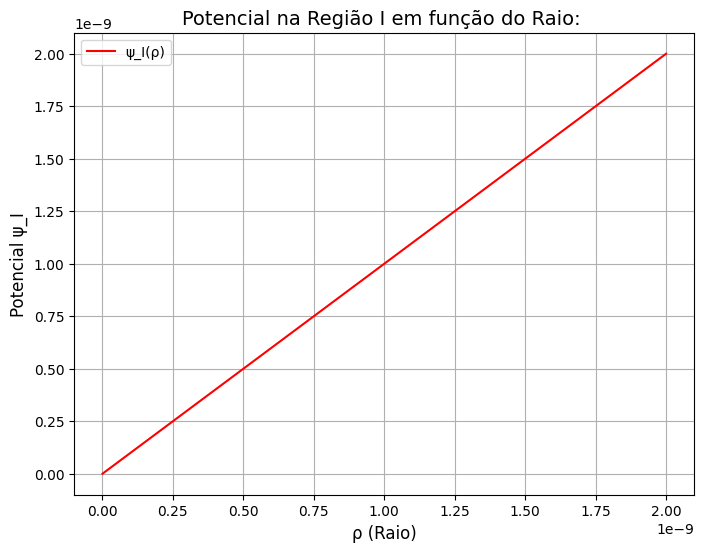

In [13]:
from IPython.display import display, Math
from scipy.special import iv as I_m
import numpy as np
import matplotlib.pyplot as plt

# Definindo Psi que será exibido
psi_IParcial = r"""
\begin{aligned}
    \psi_I &= \sum_{r=0}^1 \sum_{m=1}^\infty
    \cos\left(m\left(\phi + \frac{r\pi}{2}\right)\right)
    \rho^m
\end{aligned}
"""

# Definindo os parâmetros
L = 2e-9
c = (2 * np.pi) / L
b = 2e-9
phi = 0
z = 0

# Função para calcular só o segundo termo
def calcular_psi_I(rho, m_max=5, n_max=5):
    soma = 0.0
    for r in [0, 1]:
          for m in range(1, m_max + 1):
              # Cálculo segundo termo
              cos_phi = np.cos(m * (phi + r * np.pi / 2))
              exp = rho**m
              termo2 = cos_phi * exp
              soma += termo2
    return soma

# Explicação do que está sendo feito
print(
    '''
O segundo termo da região I está sendo plotado pq ao adicionar ele junto
com o primeiro termo foi possível verificar que quando os valores de rho
são muito pequenos os valores dele são quasenulos \n
    ''')

# Exibindo Psi
display(Math(psi_IParcial))
print('\n')

# Gerar valores de rho e calcular os potenciais
rho_valores = np.linspace(0, b, 100)
psi_valores = [calcular_psi_I(rho) for rho in rho_valores]

plt.figure(figsize=(8, 6))
plt.plot(rho_valores, psi_valores, label='ψ_I(ρ)', color='red')
plt.xlabel('ρ (Raio)', fontsize=12)
plt.ylabel('Potencial ψ_I', fontsize=12)
plt.title('Potencial na Região I em função do Raio: ', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

<IPython.core.display.Math object>



Os parâmetros que estão sendo utilizados são: 

L = 2e-09
c = 2*π/ L
b = 2e-09
d = 3e-09
phi = 0
z = 0 

O gráfico do potencial na região 2: 



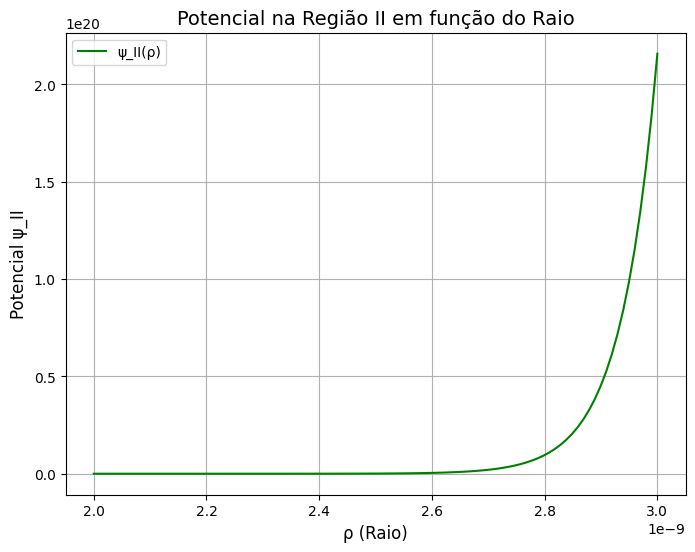

In [15]:
from IPython.display import display, Math
from scipy.special import iv as I_m
from scipy.special import kv as K_m
import numpy as np
import matplotlib.pyplot as plt

# Definindo Psi que será exibido
psi_II = r"""
\psi_{II} = \sum_{r,r'=0}^1 \sum_{n,m=0}^\infty \cos \left( m \left( \phi + \frac{r'\pi}{2} \right) \right) \cos \left( n \frac{2\pi}{L} \left( z + \frac{r\pi}{2} \right) \right) \left[ A_{II} I_m(nc\rho) + F_{II} K_m(nc\rho) \right]
"""

# Exibindo Psi
print('\n')
display(Math(psi_II))
print('\n')

# Definindo os parâmetros
L = 2e-9
c = (2 * np.pi) / L
b = 2e-9  # Raio onde o potencial dessa região começa valer
d = 3e-9  # Raio onde o potencial dessa região deixa de valer
phi = 0
z = 0

# Exibindo os parâmetros
print('Os parâmetros que estão sendo utilizados são: \n')
print(f'L = {L}')
print(f'c = 2*π/ L')
print(f'b = {b}')
print(f'd = {d}')
print(f'phi = {phi}')
print(f'z = {z} \n')

def calcular_psi_II(rho, m_max=5, n_max=5):
    soma = 0.0
    for r in [0, 1]:
        for r_linha in [0, 1]:
            for m in range(m_max + 1):
                for n in range(1, n_max + 1):  # Inicia a partir de n = 1
                    # Cálculos
                    cos_z = np.cos(n * c * (z + r * np.pi / 2))
                    cos_phi = np.cos(m * (phi + r_linha * np.pi / 2))
                    arg = n * c * rho

                    # Substituindo as constantes
                    A_II = 1.0
                    F_II = 1.0

                    # Calculando as funções de Bessel
                    bessel_I = I_m(m, arg)
                    bessel_K = K_m(m, arg)

                    # Termo do potencial
                    termo = cos_z * cos_phi * (A_II * bessel_I + F_II * bessel_K)

                    soma += termo
    return soma

# Gerando valores de rho e calcular os potenciais
rho_valores = np.linspace(b, d, 100)
psi_valores = [calcular_psi_II(rho) for rho in rho_valores]

# Plotar o gráfico
print('O gráfico do potencial na região 2: \n')

plt.figure(figsize=(8, 6))
plt.plot(rho_valores, psi_valores, label='ψ_II(ρ)', color='green')
plt.xlabel('ρ (Raio)', fontsize=12)
plt.ylabel('Potencial ψ_II', fontsize=12)
plt.title('Potencial na Região II em função do Raio', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

<IPython.core.display.Math object>



Os parâmetros que estão sendo utilizados são: 

L = 2e-09
c = 2*π/ L
d = 3e-09
rho_limite = 1e-08
phi = 0
z = 0 

O gráfico do potencial na região 2: 



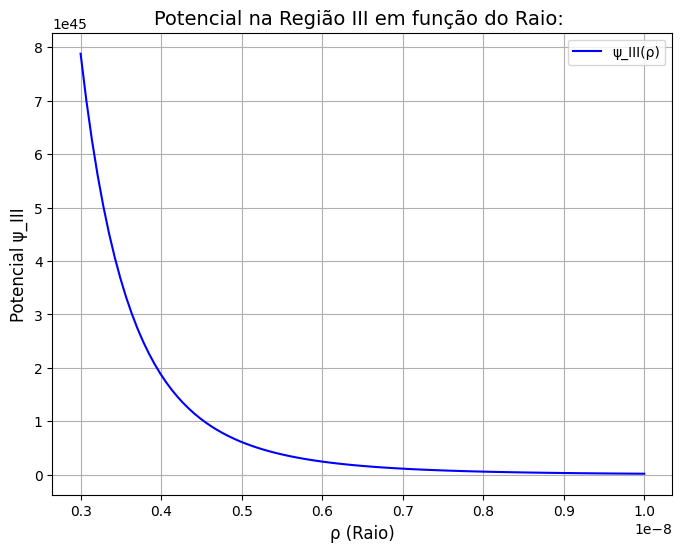

In [ ]:
from IPython.display import display, Math
from scipy.special import iv as I_m
import numpy as np
import matplotlib.pyplot as plt

# Definindo Psi_III que será exibido no display
psi_III = r"""
\psi_{III} = \sum_{r,r'=0}^1 \sum_{m=0}^\infty \sum_{n=0}^\infty \cos \left( m \left( \phi + \frac{r'\pi}{2} \right) \right) \cos \left( nc \left( z + \frac{r\pi}{2} \right) \right) K_m(\alpha p)
"""

# Exibindo Psi_III
print('\n')
display(Math(psi_III))
print('\n')

# Definindo os parâmetros
L = 2e-9
c = (2 * np.pi) / L
d = 3e-9                      #Raio onde o potencial dessa região começa valer
rho_limite = 10e-9            #Raio onde o potencial dessa região continua valendo mas até onde vai ser exibido no gráfico
phi = 0
z = 0

#Exibindo os parâmetros
print('Os parâmetros que estão sendo utilizados são: \n')
print(f'L = {L}')
print(f'c = 2*π/ L')
print(f'd = {d}')
print(f'rho_limite = {rho_limite}')
print(f'phi = {phi}')
print(f'z = {z} \n')

def calcular_psi_III(rho, m_max=5, n_max=5):
    soma = 0.0

    for r in [0, 1]:
        for r_linha in [0, 1]:
            for m in range(m_max + 1):
                for n in range(1, n_max + 1):  # Inicia a partir de n = 1
                    # Cálculos
                    cos_z = np.cos(nc * (z + r * np.pi / 2))
                    cos_phi = np.cos(m * (phi + r_linha * np.pi / 2))
                    # Escrevendo alfa #
                    nc = n * c
                    alfa = nc**2 + k**2
                    # funções de Bessel com alfa
                    bessel_K = K_m(m, alfa)
                    #Somando os termos
                    termo = cos_phi * cos_z * bessel_K
                    soma += termo
    return soma

#Gerando valores de rho e calcular os potenciais
rho_valores = np.linspace(d, rho_limite, 100)
psi_valores = [calcular_psi_III(rho) for rho in rho_valores]

# Plotar o gráfico
print('O gráfico do potencial na região 2: \n')

plt.figure(figsize=(8, 6))
plt.plot(rho_valores, psi_valores, label='ψ_III(ρ)', color='blue')
plt.xlabel('ρ (Raio)', fontsize=12)
plt.ylabel('Potencial ψ_III', fontsize=12)
plt.title('Potencial na Região III em função do Raio: ', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()